# Лабораторная работа №1
### Прудникова Анастасия М8О-114СВ-24

### Градиентный спуск и его модификации
    - Выбрать тестовые функции оптимизации (2 шт)
    - Запрограммировать собственную реализацию классического градиентного спуска
    - Запрограммировать пайплайн тестирования алгоритма оптимизации
        Визуализации функции и точки оптимума
        Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
        Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
    - Запрограммировать метод вычисления градиента
        Передача функции градиента от пользователя
        Символьное вычисление градиента (например с помощью sympy) (на доп балл)
        Численная аппроксимация градиента (на доп балл)
    - Запрограммировать одну моментную модификацию и протестировать ее
    - Запрограммировать одну адаптивную модификацию и протестировать ее
    - Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их


В качестве тестовых функций оптимизации используем функции Стыбинского-Танга и МакКормика.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# функция Стыбинского-Танга
def styblinski_tang(x):
    return 0.5 * (x[0]**4 - 16 * x[0]**2 + 5 * x[0] + x[1]**4 - 16 * x[1]**2 + 5 * x[1])

# функция МакКормика
def mccormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1


In [3]:
def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x, dtype=float)
    fx = f(x)
    for i in range(len(x)):
        x[i] += h
        grad[i] = (f(x) - fx) / h
        x[i] -= h
    return grad

In [4]:
def gradient_descent(f, grad_f, x0, alpha=0.01, epsilon=1e-6, max_iters=1000):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    
    for _ in range(max_iters):
        grad = grad_f(f, x) if callable(grad_f) else grad_f(x)
        x_new = x - alpha * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
        
    return x, np.array(trajectory)

In [5]:
x0_styblinski_tang = [0.0, 0.0]
x0_mccormick = [0.0, 0.0]

In [6]:
result_styblinski_tang, traj_styblinski_tang = gradient_descent(styblinski_tang, numerical_gradient, x0_styblinski_tang, alpha=0.001)
result_mccormick, traj_mccormick = gradient_descent(mccormick, numerical_gradient, x0_mccormick, alpha=0.01)

In [37]:
print("Styblinski–Tang minimum:", result_styblinski_tang)
print("McCormick minimum:", result_mccormick)

Styblinski–Tang minimum: [-2.90351876 -2.90351876]
McCormick minimum: [-0.54716557 -1.54716557]


### Визуализация

In [38]:
styblinski_tang_min = np.array(result_styblinski_tang)
styblinski_tang_min_value = -39.16617

In [39]:
# пайплайн
def optimization_pipeline(f, grad_f, x0, alpha, num_runs=10):
    errors = []
    trajectories = []
    
    for _ in range(num_runs):
        result, trajectory = gradient_descent(f, grad_f, x0, alpha)
        error = np.linalg.norm(result - styblinski_tang_min)
        errors.append(error)
        trajectories.append(trajectory)
    
    avg_error = np.mean(errors)
    print(f"Average error: {avg_error:.6f}")
    return trajectories, avg_error

In [40]:
def plot_3d_function_with_trajectory(f, trajectory, title, x_bounds=(-5, 5), y_bounds=(-5, 5)):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # сетка
    x = np.linspace(x_bounds[0], x_bounds[1], 100)
    y = np.linspace(y_bounds[0], y_bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([xi, yi]) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='plasma', alpha=0.6, edgecolor='none')
    ax.plot(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory], 'k-', label="Gradient descent", alpha=0.7)

    # нач точка и минимум
    ax.plot([trajectory[0, 0]], [trajectory[0, 1]], [f(trajectory[0])], 'kD', markersize=10, label="Start point")
    ax.plot([trajectory[-1, 0]], [trajectory[-1, 1]], [f(trajectory[-1])], 'kx', markersize=10, label="Found min")

    # глобальный минимум функций
    if f == styblinski_tang:
        ax.plot([-2.903534], [-2.903534], [styblinski_tang([-2.903534, -2.903534])], 'ro', markersize=10, label="Global min")
    elif f == mccormick:
        ax.plot([-0.54719], [-1.54719], [mccormick([-0.54719, -1.54719])], 'ro', markersize=10, label="Global min")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    ax.set_title(title)
    plt.show()



Styblinski–Tang minimum: [-2.90353729 -2.90353729]


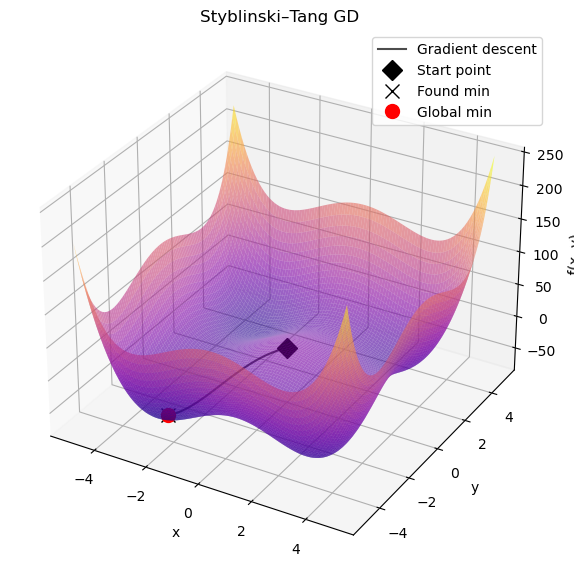

McCormick minimum: [-0.54716557 -1.54716557]


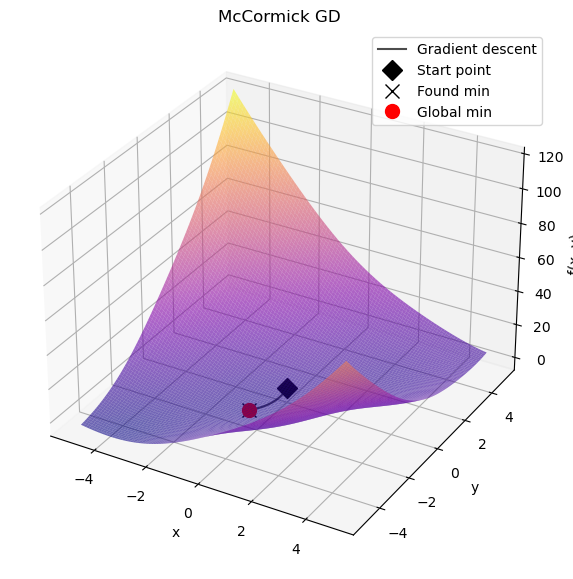

In [41]:
# Тестирование градиентного спуска
def test_functions():
    x0 = [0.0, 0.0]  # начальная точка

    result_st, trajectory_st = gradient_descent(styblinski_tang, numerical_gradient, x0, alpha=0.01)
    print("Styblinski–Tang minimum:", result_st)
    plot_3d_function_with_trajectory(styblinski_tang, trajectory_st, "Styblinski–Tang GD")

    result_mc, trajectory_mc = gradient_descent(mccormick, numerical_gradient, x0, alpha=0.01)
    print("McCormick minimum:", result_mc)
    plot_3d_function_with_trajectory(mccormick, trajectory_mc, "McCormick GD")

test_functions()

In [42]:
x0 = [0.0, 0.0]  # начальная точка
alpha = 0.01     # шаг обучения
trajectories, avg_error = optimization_pipeline(styblinski_tang, numerical_gradient, x0, alpha)


Average error: 0.000026


Добавим модификации:

1. Моментную модификацию момента для ускорения сходимости.
2. Адаптивную модификацию — например, алгоритм AdaGrad.
3. Изменим темп обучения в процессе обучения, используя экспоненциальное уменьшение.
4. Реализуем метод случайного выбора начальной точки в пределах заданного диапазона.

In [27]:
def gradient_descent_momentum(f, grad_f, x0, alpha=0.01, beta=0.9, epsilon=1e-6, max_iters=1000):
    x = np.array(x0, dtype=float)
    velocity = np.zeros_like(x)
    trajectory = [x.copy()]

    for _ in range(max_iters):
        grad = grad_f(f, x)
        velocity = beta * velocity + (1 - beta) * grad
        x_new = x - alpha * velocity
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    return x, np.array(trajectory)

In [29]:
def adagrad(f, grad_f, x0, alpha=0.1, epsilon=1e-6, max_iters=1000):
    x = np.array(x0, dtype=float)
    grad_squared_sum = np.zeros_like(x)
    trajectory = [x.copy()]

    for _ in range(max_iters):
        grad = grad_f(f, x)
        grad_squared_sum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_squared_sum) + 1e-8)
        x_new = x - alpha * adjusted_grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new

    return x, np.array(trajectory)

In [28]:
def gradient_descent_decay(f, grad_f, x0, alpha=0.1, decay_rate=0.99, epsilon=1e-6, max_iters=1000):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x)
        x_new = x - alpha * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
        alpha *= decay_rate  # уменьшаем темп обучения

    return x, np.array(trajectory)

In [30]:
def random_start(f, grad_f, bounds, alpha=0.01, method='momentum'):
    x0 = np.random.uniform(bounds[0], bounds[1], size=2)
    if method == 'momentum':
        return gradient_descent_momentum(f, grad_f, x0, alpha=alpha)
    elif method == 'adagrad':
        return adagrad(f, grad_f, x0, alpha=alpha)
    elif method == 'decay':
        return gradient_descent_decay(f, grad_f, x0, alpha=alpha)

In [33]:
def test_modifications():
    bounds = [-5, 5]

    result_st_mom, trajectory_st_mom = random_start(styblinski_tang, numerical_gradient, bounds, method='momentum')
    plot_3d_function_with_trajectory(styblinski_tang, trajectory_st_mom, "Styblinski–Tang with Momentum")

    result_mc_adagrad, trajectory_mc_adagrad = random_start(mccormick, numerical_gradient, bounds, method='adagrad')
    plot_3d_function_with_trajectory(mccormick, trajectory_mc_adagrad, "McCormick with AdaGrad")

    result_st_decay, trajectory_st_decay = random_start(styblinski_tang, numerical_gradient, bounds, method='decay')
    plot_3d_function_with_trajectory(styblinski_tang, trajectory_st_decay, "Styblinski–Tang with Learning Rate Decay")

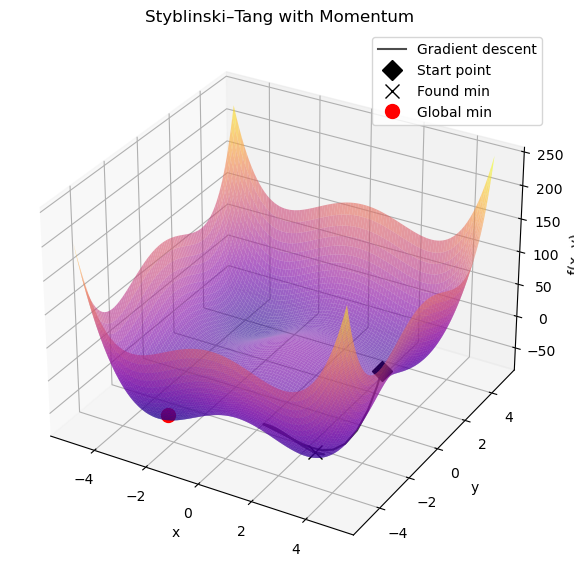

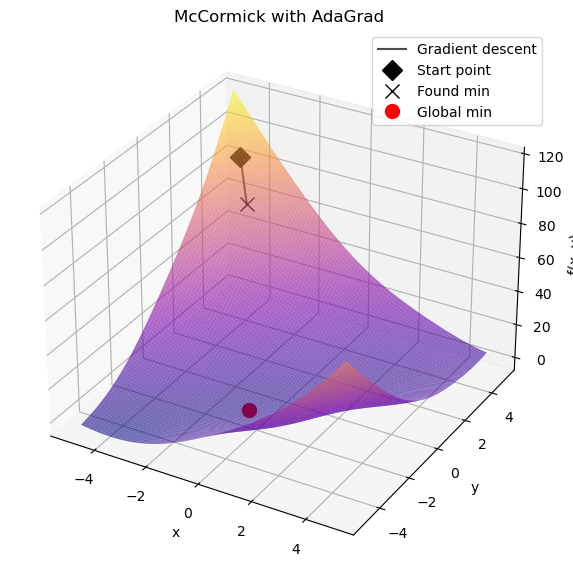

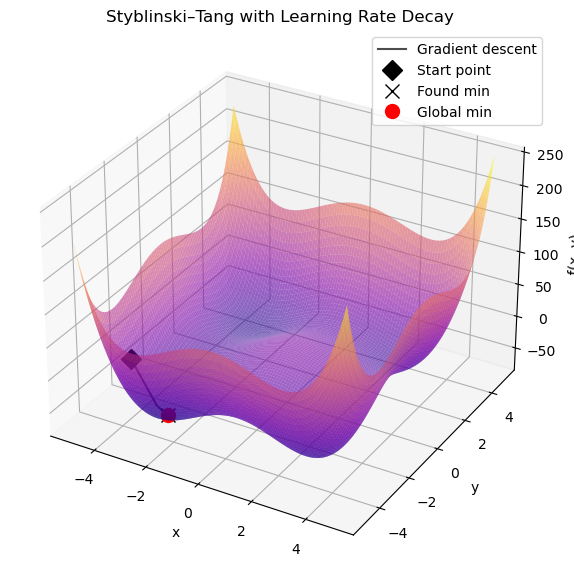

In [34]:
test_modifications()

Как видим, наиболее удачным кажется метод модификации темпа обучения. Проверим это на второй функции.

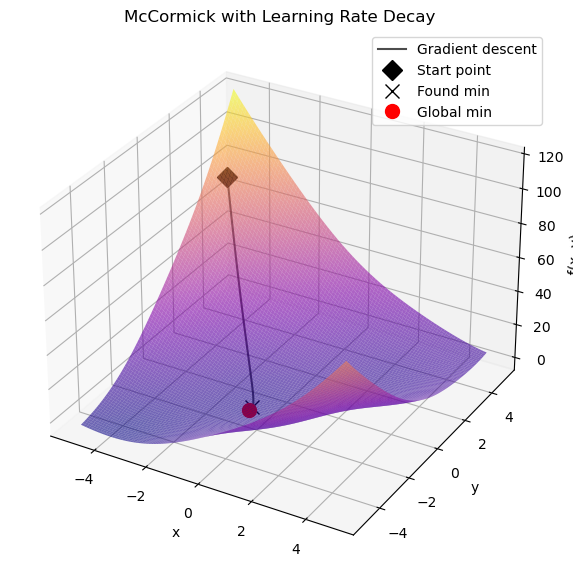

In [44]:
result_m_decay, trajectory_m_decay = random_start(mccormick, numerical_gradient, [-5, 5], method='decay')
plot_3d_function_with_trajectory(mccormick, trajectory_m_decay, "McCormick with Learning Rate Decay")

### Вывод

В рамках данной лабораторной работы был изучен и реализован метод градиентного спуска и его модификации для решения задач оптимизации, включая выбор тестовых функций, реализацию классического градиентного спуска, а также разработку нескольких модификаций для улучшения процесса оптимизации.